# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (Scaling in)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
max_positions = 1

Define the margin multiple

In [6]:
margin = 2

Run Strategy

In [7]:
s = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=max_positions, stop_loss_pct=85, margin=margin)
s.run()

Retrieve log DataFrames

In [8]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [9]:
s.rlog.tail(10)

,date,price,shares,entry_exit,direction,symbol
520,2019-09-20,298.28,2359,entry,LONG,SPY
521,2019-10-11,296.28,2359,exit,LONG,SPY
522,2019-12-03,309.55,2243,entry,LONG,SPY
523,2019-12-12,317.13,2243,exit,LONG,SPY
524,2020-01-27,323.50,2251,entry,LONG,SPY
525,2020-02-04,329.06,2251,exit,LONG,SPY
526,2020-02-21,333.48,2259,entry,LONG,SPY
527,2020-03-04,312.86,2259,exit,LONG,SPY
528,2020-06-24,304.09,2171,entry,LONG,SPY
529,2020-07-02,312.23,2171,exit,LONG,SPY


In [10]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
255,2019-05-01,291.81,2019-05-03,294.03,2.22,5299.14,2387,343648.20,LONG,SPY
256,2019-05-07,287.93,2019-06-05,282.96,-4.97,-12206.32,2456,331441.88,LONG,SPY
257,2019-06-26,290.47,2019-07-01,295.66,5.19,12196.51,2350,343638.39,LONG,SPY
258,2019-07-19,297.17,2019-07-24,301.44,4.27,10162.57,2380,353800.96,LONG,SPY
259,2019-07-31,297.43,2019-08-29,292.58,-4.85,-11863.11,2446,341937.85,LONG,SPY
260,2019-09-20,298.28,2019-10-11,296.28,-2.00,-4718.00,2359,337219.85,LONG,SPY
261,2019-12-03,309.55,2019-12-12,317.13,7.58,17001.98,2243,354221.82,LONG,SPY
262,2020-01-27,323.50,2020-02-04,329.06,5.56,12515.55,2251,366737.38,LONG,SPY
263,2020-02-21,333.48,2020-03-04,312.86,-20.62,-46580.64,2259,320156.74,LONG,SPY
264,2020-06-24,304.09,2020-07-02,312.23,8.14,17671.97,2171,337828.71,LONG,SPY


In [11]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-07-08,347828.71,347828.71,347828.71,0,347828.71,0.00,-
2020-07-09,347828.71,347828.71,347828.71,0,347828.71,0.00,-
2020-07-10,347828.71,347828.71,347828.71,0,347828.71,0.00,-
2020-07-13,347828.71,347828.71,347828.71,0,347828.71,0.00,-
2020-07-14,347828.71,347828.71,347828.71,0,347828.71,0.00,-


Generate strategy stats - display all available stats

In [12]:
pf.print_full(stats)

start                                                  1993-11-11
end                                                    2020-07-14
beginning_balance                                           10000
ending_balance                                          347828.71
total_net_profit                                        337828.71
gross_profit                                            710677.35
gross_loss                                             -372848.64
profit_factor                                                1.91
return_on_initial_capital                                 3378.29
annual_return_rate                                          14.23
trading_period                           26 years 8 months 3 days
pct_time_in_market                                          29.65
margin                                                          2
avg_leverage                                                 2.02
max_leverage                                                 2.39
min_levera

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [13]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-14 00:00:00 SELL 215 SPY @ 316.03


Plot Equity Curves: Strategy vs Benchmark

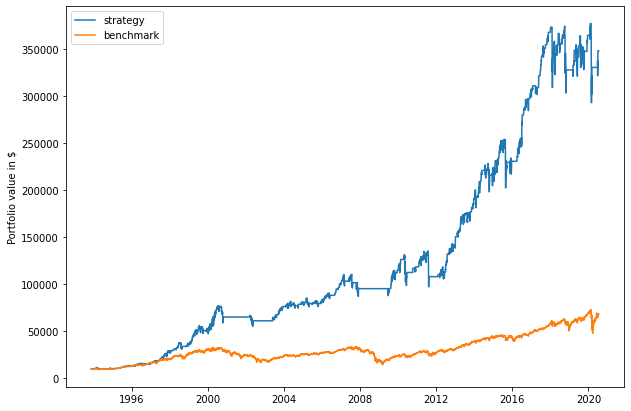

In [14]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

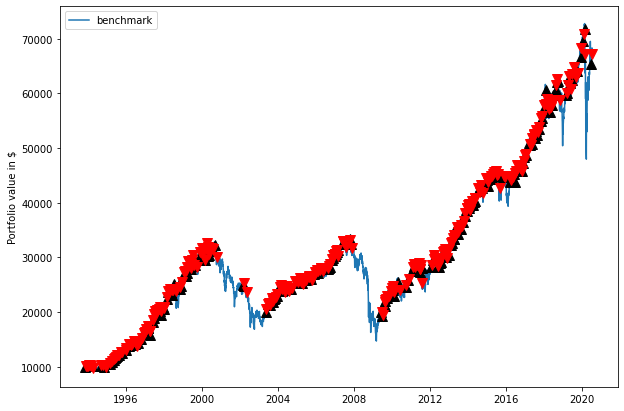

In [15]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,14.23,7.45
max_closed_out_drawdown,-28.24,-56.42
drawdown_annualized_return,-1.98,-7.57
drawdown_recovery,-1.84,-1.42
best_month,27.98,23.06
worst_month,-27.25,-31.38
sharpe_ratio,0.76,0.47
sortino_ratio,0.56,0.60
monthly_std,4.28,4.54


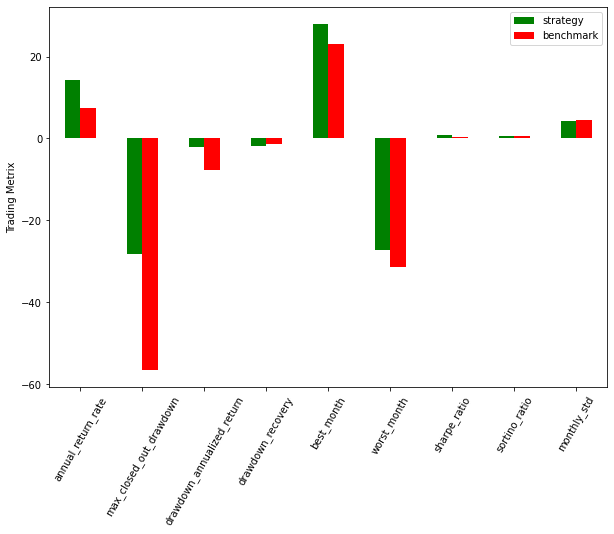

In [16]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df